In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# The gwasdf is the big table that keeps the dosage data per sample per SNP:
gwasdf = pd.read_csv("../../data/HoloFish_HostG_GenotypeProbability.dose", sep=" ")
transcriptome_XY = pd.read_csv("../../data/transcriptome_XY.csv", index_col=0)
GFGWA_df = pd.read_csv("../../data/GFGWA_genes_minpval.csv", index_col=0)
# GFGWA_df["minpval"] = GFGWA_df[['pval_AltGreater', 'pval_AltLess']].min(axis=1)


In [55]:
# Load a mapping of IndX --> FXXX names
sidm = pd.read_csv("../../data/HoloFish_FishVariables_20221116.csv")
sidm = sidm[["Sample.ID","HostG.Ind.ID"]]
sampleD = {b:a for a,b in sidm.dropna().values}
# rename the samples in the raw gwasdf
gwasdf.columns = list(gwasdf.columns[:3]) + [sampleD.get(x) for x in gwasdf.columns[3:]]

In [56]:
metadata = pd.read_csv("../../data/HoloFish_FishVariables_20221116.csv")
fish_weights = metadata[["Sample.ID", "Gutted.Weight.kg"]]
fish_weights

,Sample.ID,Gutted.Weight.kg
0,F001,3.240
1,F010,1.770
2,F100,3.150
3,F101,3.210
4,F102,3.340
...,...,...
458,F416,5.840
459,F417,2.310
460,F418,2.360
461,F419,2.910


In [77]:
hbalike = "LOC106601078"
mutation_gene = "LOC106607380"


In [78]:
GFGWA_markers = pd.read_csv("../../data/GFGWA_gene_results_all.csv", index_col=0)
GFGWA_markers

,Marker,pval_AltGreater,pval_AltLess,var_count,pval_AltGreater_log,pval_AltLess_log,maxscore,significant,gene,score,minpval
0,NC_059467.1_10497366,0.797413,0.202889,241,0.098317,0.692742,0.692742,False,prs6a,0.692742,0.202889
1,NC_059463.1_7937932,0.723830,0.276544,259,0.140363,0.558235,0.558235,False,LOC106582707,0.558235,0.276544
2,NC_059452.1_107247216,0.417665,0.582887,54,0.379172,0.234416,0.379172,False,gbe1a,0.379172,0.417665
3,NC_059454.1_21849761,0.460129,0.540276,209,0.337120,0.267384,0.337120,False,LOC106566637,0.337120,0.460129
4,NC_059453.1_26042743,0.470851,0.529803,38,0.327117,0.275885,0.327117,False,LOC106564707,0.327117,0.470851
...,...,...,...,...,...,...,...,...,...,...,...
1045345,NC_059470.1_26324643,0.951759,0.048353,104,0.021473,1.315578,1.315578,False,LOC106590443,1.315578,0.048353
1045346,NC_059468.1_14798428,0.989458,0.010570,182,0.004603,1.975915,1.975915,False,akap9,1.975915,0.010570
1045347,NC_059451.1_21847576,0.414601,0.585807,132,0.382370,0.232245,0.382370,False,unc13a,0.382370,0.414601
1045348,NC_059443.1_54251914,0.800762,0.199552,101,0.096496,0.699945,0.699945,False,LOC106588447,0.699945,0.199552


In [79]:
GFGWA_markers[GFGWA_markers["gene"] == mutation_gene]
#GFGWA_markers[GFGWA_markers["gene"].str.contains("hemoglobin")]

,Marker,pval_AltGreater,pval_AltLess,var_count,pval_AltGreater_log,pval_AltLess_log,maxscore,significant,gene,score,minpval
355619,NC_059447.1_37590861,0.81873,0.181543,139,0.086859,0.741021,0.741021,False,LOC106607380,0.741021,0.181543


In [80]:
mutation = "NC_059447.1_37590861"

In [122]:
gwasdf_marker = gwasdf[gwasdf["marker"] == mutation]
gwasdf_marker = gwasdf_marker.T.drop(["marker", "alleleA", "alleleB"])
gwasdf_marker.rename(columns={822739: "genotype"}, inplace=True)
gwasdf_marker

,genotype
F001,0.0001
F002,0.6194
F003,0.0
F004,1.0
F005,0.0012
...,...
F449,1.0
F450,1.0
F451,1.5995
F460,0.1542


In [123]:
gwasdf_marker["one_zero"] = gwasdf_marker["genotype"]>0.001
gwasdf_marker

,genotype,one_zero
F001,0.0001,False
F002,0.6194,True
F003,0.0,False
F004,1.0,True
F005,0.0012,True
...,...,...
F449,1.0,True
F450,1.0,True
F451,1.5995,True
F460,0.1542,True


In [124]:
transcriptome_XY

,1433b,143b2,143g1,2a5e,4f2,5nt1a,LOC100136352,LOC100136353,LOC100136354,LOC100136364,...,znt4,znt6,zranb2,zswim5,zswim8,zte38,zufsp,zyg11,zzef1,gutted.weight.kg
F001,8.298729,10.908738,9.425202,8.779539,10.929669,7.111388,12.583505,11.712159,10.124062,8.345641,...,8.489126,8.190617,7.973296,7.882944,8.636611,8.999665,6.577016,7.471161,8.272468,3.240
F002,8.228803,10.642114,8.008146,8.664696,9.849611,7.783078,12.492871,12.026031,11.429684,7.701277,...,7.205885,8.132349,8.658153,7.593406,7.944367,9.163664,6.542679,6.748560,8.465317,4.180
F003,8.643025,10.539054,8.000962,8.201590,10.582260,7.636555,12.700801,11.418342,10.488037,8.113418,...,8.579031,8.124747,8.715461,7.483913,8.381856,8.696754,6.865387,7.501747,8.243687,5.890
F004,5.956833,10.835880,8.092081,8.547840,9.075364,8.207422,13.283415,11.583582,11.180475,7.705314,...,6.195422,7.561927,8.849315,8.027654,8.051427,9.126017,6.565920,6.900831,8.453580,4.890
F005,6.892844,11.015085,7.600201,8.461058,9.100262,7.466592,12.768129,11.846070,10.495586,7.677500,...,6.701055,7.873324,8.836080,8.150358,7.853622,9.499643,6.491205,7.128698,7.930806,3.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F450,8.197073,10.629662,9.355759,8.723406,10.701376,7.170370,13.095476,11.476600,12.086811,7.735623,...,7.634688,8.306277,8.400094,7.608247,8.134562,8.630035,6.433649,7.553774,8.322352,1.645
F456,7.759628,11.055183,8.654288,9.059819,9.624544,7.364918,12.835405,11.793184,12.456062,7.485766,...,7.485766,6.749432,9.106140,7.485766,8.103360,7.977881,6.280543,7.023918,8.727422,1.980
F458,9.983777,11.766481,8.220540,8.019322,10.493871,7.168827,13.948246,11.870888,12.054974,8.744106,...,7.168827,7.375141,7.168827,7.375141,8.744106,7.051999,5.033837,6.163356,7.996756,1.120
F459,8.409117,10.899049,9.156758,8.108310,9.991265,7.827205,13.391611,11.956632,13.295898,6.904554,...,6.669984,6.399689,8.064149,5.999265,5.033837,7.879397,5.033837,5.999265,6.669984,0.960


In [125]:

transcriptome_hba = transcriptome_XY[["hba", mutation_gene]]
transcriptome_hba


,hba,LOC106607380
F001,7.841489,6.684127
F002,8.049102,7.776955
F003,9.321372,9.142760
F004,9.442323,7.953808
F005,9.187983,8.223300
...,...,...
F450,9.183097,8.909547
F456,10.432081,9.924495
F458,8.419208,8.547975
F459,6.873686,5.033837


In [126]:
gwasdf_marker = pd.merge(left=gwasdf_marker, right=fish_weights, left_on=gwasdf_marker.index, right_on="Sample.ID")


In [127]:
gwasdf_marker = pd.merge(left = gwasdf_marker, right = transcriptome_hba, left_on="Sample.ID", right_on=transcriptome_hba.index)
gwasdf_marker

,genotype,one_zero,Sample.ID,Gutted.Weight.kg,hba,LOC106607380
0,0.0001,False,F001,3.240,7.841489,6.684127
1,0.6194,True,F002,4.180,8.049102,7.776955
2,0.0,False,F003,5.890,9.321372,9.142760
3,1.0,True,F004,4.890,9.442323,7.953808
4,0.0012,True,F005,3.980,9.187983,8.223300
...,...,...,...,...,...,...
246,0.2685,True,F446,5.110,7.588761,6.819724
247,0.0804,True,F447,4.500,9.587867,9.135821
248,0.0013,True,F448,1.580,8.428568,8.485055
249,1.0,True,F450,1.645,9.183097,8.909547


In [128]:
gwasdf_marker["Ratio"] = gwasdf_marker["hba"]/ gwasdf_marker[mutation_gene]

In [129]:
groupA = gwasdf_marker[gwasdf_marker["one_zero"] == False]
groupB = gwasdf_marker[gwasdf_marker["one_zero"] == True]
print(groupA.shape, groupB.shape)

(29, 7) (222, 7)


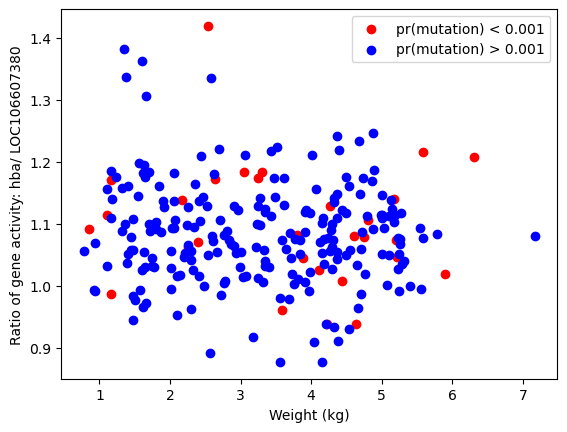

In [131]:
plt.scatter(y = groupA["Ratio"], x = groupA["Gutted.Weight.kg"], c="r", label="pr(mutation) < 0.001")
plt.scatter(y = groupB["Ratio"], x = groupB["Gutted.Weight.kg"], c="b", label="pr(mutation) > 0.001")
plt.xlabel("Weight (kg)")
plt.ylabel(f"Ratio of gene activity: hba/ {mutation_gene}")
plt.legend()